<center><img src="https://github.com/DACSS-CSSmeths/guidelines/blob/main/pics/small_logo_ccs_meths.jpg?raw=true" width="700"></center>


# PRE HOMEWORK

# Case 1: Elites in Peru

<a target="_blank" href="https://colab.research.google.com/github/DACSS-CSSmeths/Networks_intro/blob/main/case1.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

The network we are going to build is based on the relationships studied in this [paper](https://ideas.repec.org/a/eee/quaeco/v48y2008i2p263-273.html):

<img src="https://github.com/DACSS-CSSmeths/Networks_intro/blob/main/pics/paper.png?raw=true" width="500">


In that paper, Professor Figueroa shows this table, where 1 represents that both nodes (families) appear together at least once sitting in the same top company board. This is a good example of a _symmetric_ relationship. Notice the last column is an attribute:

<img src="https://github.com/DACSS-CSSmeths/Networks_intro/blob/main/pics/dataRed.png?raw=true" width="500">

This is an spreadsheet, with some modifications, representing the information above:

In [1]:
from IPython.display import IFrame
IFrame("https://docs.google.com/spreadsheets/d/e/2PACX-1vSHI_TY6rh9zEctvxnk83Vg88m1uXAEPA9DYT__TYOt5eS2mFovlraOXkaUcV8YZhbU30u34NfaMpY1/pubhtml",1200,350)

The modifications are:
* I do not have "1"s in the diagonal (now Romero and Romero have no 1 in the intersection). This is the right way.
* I put the the column with the attribute "Multinacional" in another sheet.

We can download the **adjacency** from my Excel file from GitHub:

In [2]:
# reading in
import pandas as pd
LinkToData="https://github.com/DACSS-CSSmeths/Networks_intro/raw/refs/heads/main/casesData/dataFigueroa.xlsx"
FigueData = pd.read_excel(LinkToData,sheet_name='Relationships',
                          index_col=0) #notice!!!!!

We also have get the table with attributes:

In [3]:
FigueAttr = pd.read_excel(LinkToData,sheet_name='Attributes')

FigueAttr

,node,Multinacional
0,Romero,1
1,Graña,1
2,Miro Quesada,1
3,Moreyra,1
4,Fort,1
5,De La Puente,1
6,Wiese,1
7,Onrubia,1
8,Brescia,1
9,Nicolini,1


Prepare the right (directed or undirected?) network, including  the node attributes, and save (export) the network as a _graphml_ file.

__________

Go back to the [INTRO](https://dacss-cssmeths.github.io/Networks_intro/)

In [4]:
import networkx as nx

graph = nx.from_pandas_adjacency(FigueData) # create graph from FigueData

# see edges
graph.edges.data()

EdgeDataView([('Romero', 'Graña', {'weight': 1}), ('Romero', 'Miro Quesada', {'weight': 1}), ('Romero', 'Moreyra', {'weight': 1}), ('Romero', 'Fort', {'weight': 1}), ('Romero', 'De La Puente', {'weight': 1}), ('Romero', 'Onrubia', {'weight': 1}), ('Romero', 'Brescia', {'weight': 1}), ('Romero', 'Nicolini', {'weight': 1}), ('Romero', 'Bentin', {'weight': 1}), ('Romero', 'Benavides', {'weight': 1}), ('Romero', 'Bustamante', {'weight': 1}), ('Romero', 'Woodman Pollit', {'weight': 1}), ('Romero', 'Raffo', {'weight': 1}), ('Romero', 'Piazza', {'weight': 1}), ('Romero', 'Berckemeyer', {'weight': 1}), ('Romero', 'Llosa Barber', {'weight': 1}), ('Romero', 'Rizo Patron', {'weight': 1}), ('Romero', 'Montori', {'weight': 1}), ('Graña', 'Miro Quesada', {'weight': 1}), ('Graña', 'Fort', {'weight': 1}), ('Graña', 'De La Puente', {'weight': 1}), ('Graña', 'Wiese', {'weight': 1}), ('Graña', 'Montero', {'weight': 1}), ('Graña', 'Benavides', {'weight': 1}), ('Graña', 'Bustamante', {'weight': 1}), ('Grañ

In [5]:
graph.nodes.data()

NodeDataView({'Romero': {}, 'Graña': {}, 'Miro Quesada': {}, 'Moreyra': {}, 'Fort': {}, 'De La Puente': {}, 'Wiese': {}, 'Onrubia': {}, 'Brescia': {}, 'Nicolini': {}, 'Montero': {}, 'Picaso': {}, 'Bentin': {}, 'Benavides': {}, 'Bustamante': {}, 'Woodman Pollit': {}, 'Raffo': {}, 'Piazza': {}, 'Berckemeyer': {}, 'Llosa Barber': {}, 'Beoutis Ledesma': {}, 'Rizo Patron': {}, 'Montori': {}, 'Sotomayor': {}, 'Cilloniz': {}, 'Ferreyros': {}, 'Michell': {}, 'Wong Lu': {}, 'Batievsky Spack': {}, 'Matos Escalada': {}, 'Galsky': {}, 'Lucioni': {}, 'Rodriguez Rodríguez': {}, 'Custer': {}, 'Ikeda': {}, 'Cogorno': {}, 'Arias Davila': {}})

In [13]:
# add attributes
attribute_dict = FigueAttr.set_index('node').to_dict('index')
# attribute_dict = {n:s for n,s in zip(FigueAttr.node,FigueAttr.Multinacional)}

{'Romero': 1,
 'Graña': 1,
 'Miro Quesada': 1,
 'Moreyra': 1,
 'Fort': 1,
 'De La Puente': 1,
 'Wiese': 1,
 'Onrubia': 1,
 'Brescia': 1,
 'Nicolini': 1,
 'Montero': 1,
 'Picaso': 1,
 'Bentin': 1,
 'Benavides': 1,
 'Bustamante': 1,
 'Woodman Pollit': 1,
 'Raffo': 1,
 'Piazza': 1,
 'Berckemeyer': 0,
 'Llosa Barber': 1,
 'Beoutis Ledesma': 1,
 'Rizo Patron': 1,
 'Montori': 1,
 'Sotomayor': 1,
 'Cilloniz': 1,
 'Ferreyros': 0,
 'Michell': 0,
 'Wong Lu': 1,
 'Batievsky Spack': 1,
 'Matos Escalada': 1,
 'Galsky': 0,
 'Lucioni': 0,
 'Rodriguez Rodríguez': 1,
 'Custer': 0,
 'Ikeda': 0,
 'Cogorno': 0,
 'Arias Davila': 1}

In [14]:
# assigning color condtionally to sex
# write 'red' as value for  'node', if the 'sex' of 'node' is 'female', else, write 'blue'
# do this for every pair 'node','sex' in 'nx.get_node_attributes(dG, "sex").items()'
{node:'red' if Multinacional==0 else 'green' for node, Multinacional in nx.get_node_attributes(graph, "Multinacional").items()}

{'Romero': 'green',
 'Graña': 'green',
 'Miro Quesada': 'green',
 'Moreyra': 'green',
 'Fort': 'green',
 'De La Puente': 'green',
 'Wiese': 'green',
 'Onrubia': 'green',
 'Brescia': 'green',
 'Nicolini': 'green',
 'Montero': 'green',
 'Picaso': 'green',
 'Bentin': 'green',
 'Benavides': 'green',
 'Bustamante': 'green',
 'Woodman Pollit': 'green',
 'Raffo': 'green',
 'Piazza': 'green',
 'Berckemeyer': 'red',
 'Llosa Barber': 'green',
 'Beoutis Ledesma': 'green',
 'Rizo Patron': 'green',
 'Montori': 'green',
 'Sotomayor': 'green',
 'Cilloniz': 'green',
 'Ferreyros': 'red',
 'Michell': 'red',
 'Wong Lu': 'green',
 'Batievsky Spack': 'green',
 'Matos Escalada': 'green',
 'Galsky': 'red',
 'Lucioni': 'red',
 'Rodriguez Rodríguez': 'green',
 'Custer': 'red',
 'Ikeda': 'red',
 'Cogorno': 'red',
 'Arias Davila': 'green'}

In [15]:
# assign colour to node
# dict saved a 'colorDict'
colorNodes = {node:'red' if Multinacional==0 else 'green' for node, Multinacional in nx.get_node_attributes(graph, "Multinacional").items()}
nx.set_node_attributes(graph, colorNodes, "color")

# nx.set_node_attributes(graph, attribute_dict , "Multinacional")
# nx.set_node_attributes(graph, attribute_dict)

# the attribute is now in the node data:
graph.nodes.data()

# seeing attributes
nx.get_node_attributes(graph, "Multinacional")

{'Romero': 1,
 'Graña': 1,
 'Miro Quesada': 1,
 'Moreyra': 1,
 'Fort': 1,
 'De La Puente': 1,
 'Wiese': 1,
 'Onrubia': 1,
 'Brescia': 1,
 'Nicolini': 1,
 'Montero': 1,
 'Picaso': 1,
 'Bentin': 1,
 'Benavides': 1,
 'Bustamante': 1,
 'Woodman Pollit': 1,
 'Raffo': 1,
 'Piazza': 1,
 'Berckemeyer': 0,
 'Llosa Barber': 1,
 'Beoutis Ledesma': 1,
 'Rizo Patron': 1,
 'Montori': 1,
 'Sotomayor': 1,
 'Cilloniz': 1,
 'Ferreyros': 0,
 'Michell': 0,
 'Wong Lu': 1,
 'Batievsky Spack': 1,
 'Matos Escalada': 1,
 'Galsky': 0,
 'Lucioni': 0,
 'Rodriguez Rodríguez': 1,
 'Custer': 0,
 'Ikeda': 0,
 'Cogorno': 0,
 'Arias Davila': 1}

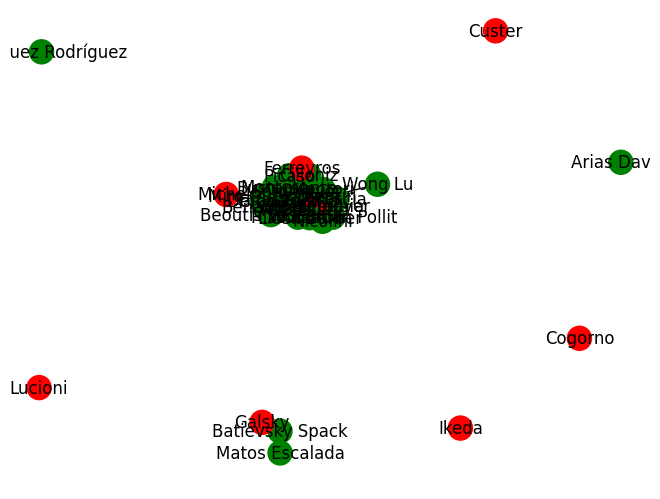

In [17]:

# drawing graph
nx.draw(graph,
        with_labels=True,
        # nx.set_node_attributes(graph, attribute_dict))
        node_color=nx.get_node_attributes(graph, 'color').values())